Bài 1: Thực hiện lại các câu hỏi (Câu 1 đến Câu 5) trong mục 2 để xây dựng lại mô hình hồi quy tuyến tính.

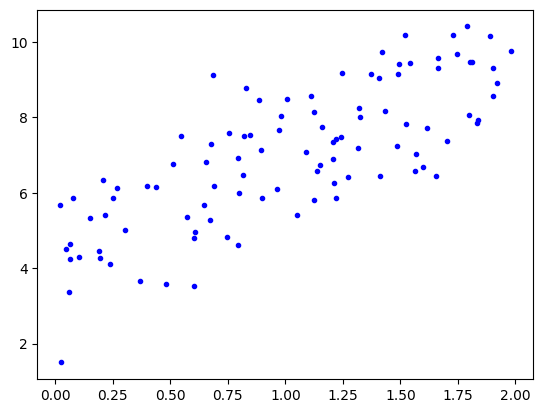

In [27]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
plt.plot(X, y, "b.")


In [28]:
X_b.shape

(100, 2)

In [29]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict


array([[4.42429486],
       [9.48690345]])

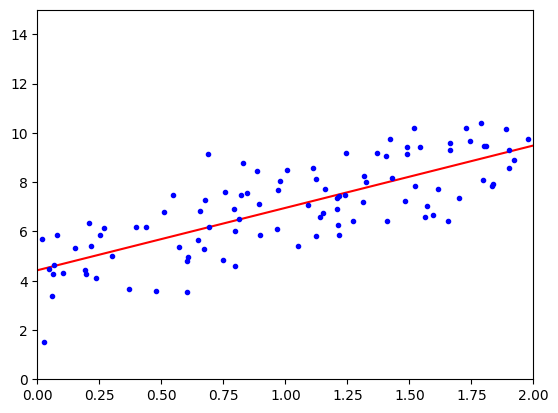

In [30]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


Bài 2: Thực hiện xây dựng mô hình hồi quy đa thức (Polynomial Regression) cho dữ liệu đa thức như sau:

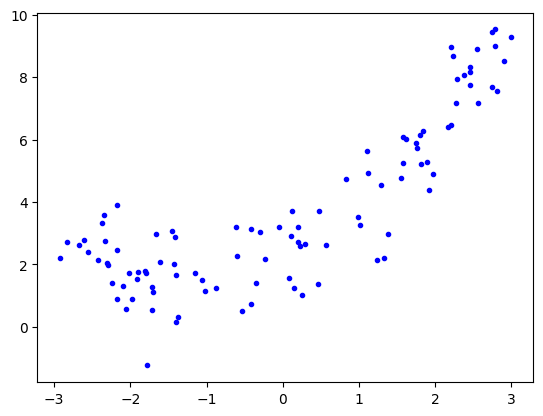

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")


In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

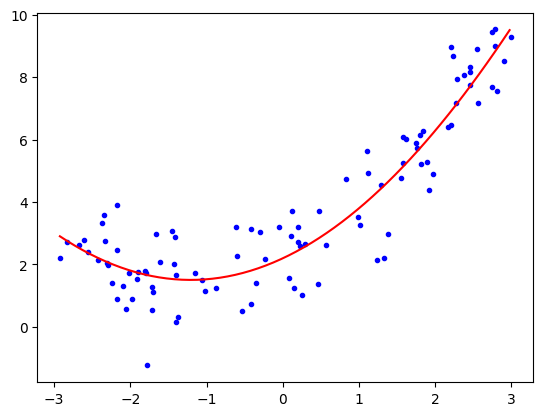

In [45]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X,y,"b.")
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), "r-")
plt.show()

Bài 3: Hãy xây dựng mô hình hồi quy Ridge. Thực hiện tương tự như Bài 1.

𝜽=(𝑿𝑻𝑿+𝜶𝑰)−𝟏𝑿𝑻𝒚, alpha = 0.02

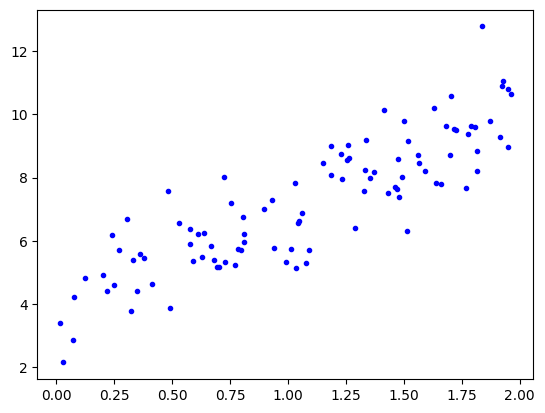

In [53]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X]
plt.plot(X, y, "b.")

In [61]:
alpha = 0.02
theta_best = np.linalg.inv(X_b.T.dot(X_b)+np.identity(2).dot(alpha)).dot(X_b.T).dot(y)
print(theta_best)

[[3.8040964]
 [3.1586711]]


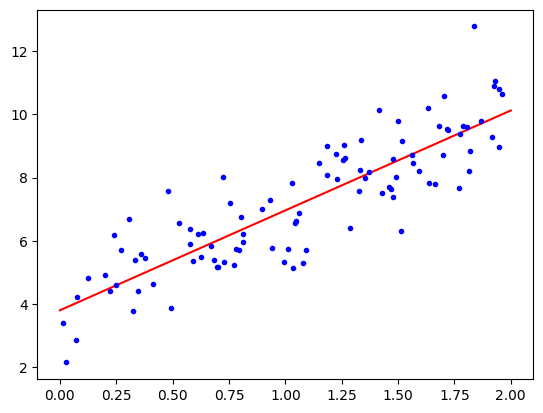

In [63]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

Bài 4: Các bạn hãy so sánh giữa tham số tối ưu tìm được bằng tay và bằng thư viện sklearn trong Bài 1 và Bài 3. So sánh kết quả thu được giữa thực hiện bằng tay và bằng thư viện.

1. Tính bằng tay

In [64]:
#theta_best Linear Regression
theta_best_2 = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best_2)

[[3.80551419]
 [3.15806147]]


In [65]:
#theta_best Ridge Regression
alpha = 0.02
theta_best = np.linalg.inv(X_b.T.dot(X_b)+np.identity(2).dot(alpha)).dot(X_b.T).dot(y)
print(theta_best)

[[3.8040964]
 [3.1586711]]


2. Tính bằng thư viện sklearn

In [66]:
#theta_best Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_,lin_reg.coef_)

[3.80551419] [[3.15806147]]


In [67]:
#theta_best Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.02,solver="auto")
ridge_reg.fit(X,y)
print(ridge_reg.intercept_,ridge_reg.coef_)

[3.80771791] [[3.15601657]]


Nhận xét: cả cách tính bằng tay và sử dụng thư viện đều cho ra kết quả gần tương đương nhau, ít có sự chênh lệch